In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-08-20 19:23:39--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-08-20 19:23:40 (39.4 MB/s) - ‘moore.csv’ saved [2302/2302]



In [13]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [36]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [37]:
X = data[:, 0]

In [40]:
X = X.reshape(162, 1)

In [41]:
X.shape

(162, 1)

In [38]:
Y = data[:, 1]

In [43]:
Y = Y.reshape(162, 1)
Y = np.log(Y)

In [30]:
Y.shape

(162, 1)

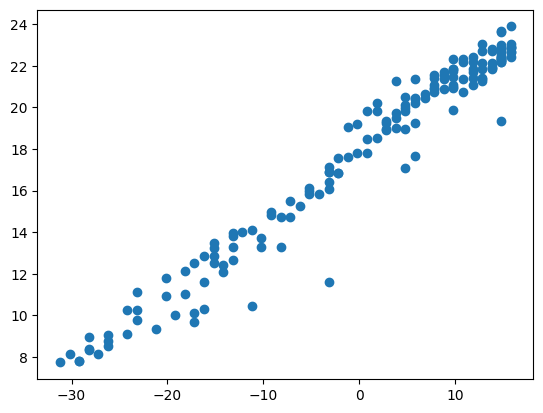

In [46]:
plt.scatter(X, Y)

In [45]:
X = X - np.mean(X)

In [56]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

In [57]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='mse')

In [58]:
def schedule(epochs, lr):
  if epochs>=50:
    return 0.00001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [59]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 377.8450 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 376.9764 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 284.2469 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 324.1463 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 310.3924 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 230.1583 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 205.1698 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 165.6787 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 138.7417 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 134.8109 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - los

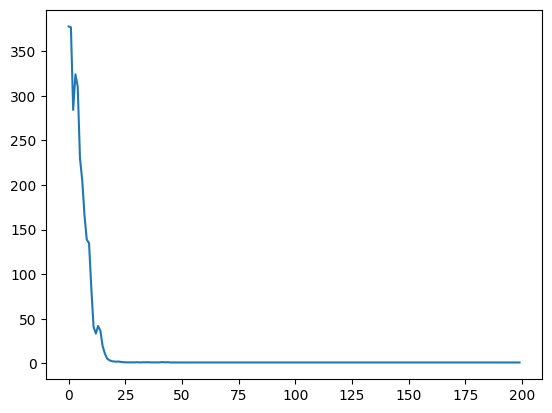

In [60]:
plt.plot(r.history['loss'])
plt.legend()

In [78]:
a = model.layers[0].get_weights()[0][0,0]

0.34391156

In [85]:
b = model.layers[0].get_weights()[1][0]